<a href="https://colab.research.google.com/github/vistec-AI/colab/blob/master/easyocr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# ติดตั้ง
!pip install easyocr

     |████████████████████████████████| 13.5MB 302kB/s 
     |████████████████████████████████| 2.1MB 45.1MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 7.0.0
    Uninstalling Pillow-7.0.0:
      Successfully uninstalled Pillow-7.0.0


แล้ว RESTART Runtime ก่อนค่อย run ต่อ

In [1]:
# ใช้รูปตัวอย่างจาก github 
!npx degit JaidedAI/EasyOCR/examples -f

npx: installed 1 in 3.213s
> destination directory is not empty. Using --force, continuing
> cloned JaidedAI/EasyOCR#master


In [2]:
!ls -l *.png *.jpg

-rw-r--r-- 1 root root   59898 Jul 10 04:22 chinese.jpg
-rw-r--r-- 1 root root 1740957 Jul 10 04:22 english.png
-rw-r--r-- 1 root root  566156 Jul 10 04:22 example2.png
-rw-r--r-- 1 root root  488641 Jul 10 04:22 example.png
-rw-r--r-- 1 root root  168376 Jul 10 04:22 french.jpg
-rw-r--r-- 1 root root   42159 Jul 10 04:22 japanese.jpg
-rw-r--r-- 1 root root  225531 Jul 10 04:22 korean.png
-rw-r--r-- 1 root root   82229 Jul 10 04:22 thai.jpg


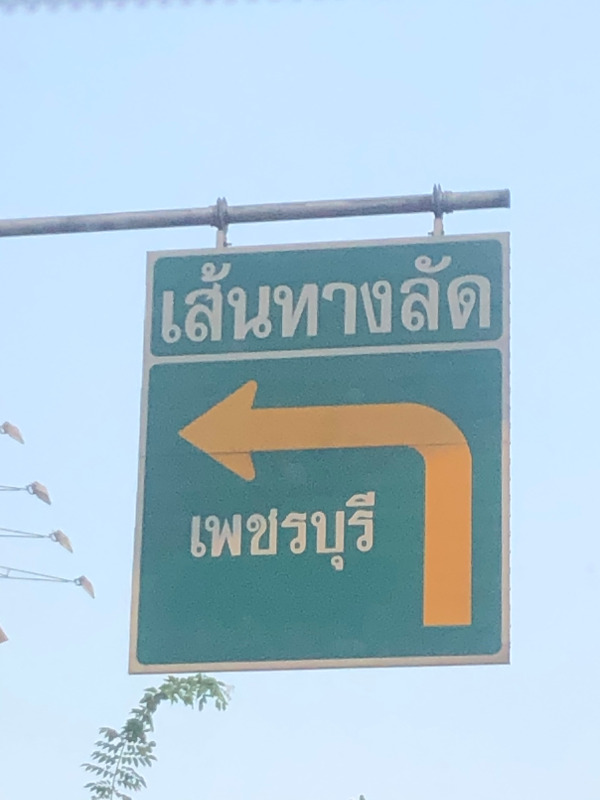

In [3]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open("thai.jpg")
im

In [6]:
# เรียกใช้ OCR
import easyocr
reader = easyocr.Reader(['th','en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [7]:
bounds = reader.readtext('thai.jpg')
bounds

[([[142, 232], [500, 232], [500, 361], [142, 361]],
  'เส้นทางลัด',
  0.10795288532972336),
 ([[177, 483], [385, 483], [385, 573], [177, 573]],
  'เพชรบุรี',
  0.540562093257904)]

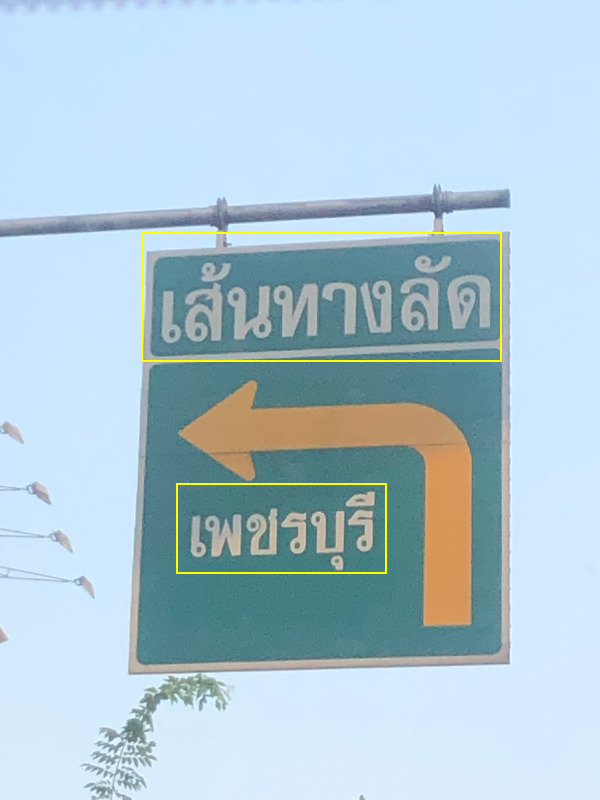

In [8]:
# วาด bounding box
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)